In [1]:
import logging

logging.basicConfig(level=logging.DEBUG)
import matplotlib.pyplot as plt
logging.getLogger("matplotlib").setLevel(logging.WARNING)
import numpy as np
import pandas as pd
import xarray as xr
import scipy.interpolate as interpolate

from preprocess_toolbox.interface import get_processor_from_source
from preprocess_toolbox.utils import get_config, get_implementation


%matplotlib inline

DEBUG:matplotlib:matplotlib data path: /home/jambyr/miniconda3/envs/icenet4/lib/python3.9/site-packages/matplotlib/mpl-data
DEBUG:matplotlib:CONFIGDIR=/home/jambyr/.config/matplotlib
DEBUG:matplotlib:interactive is False
DEBUG:matplotlib:platform is linux
DEBUG:matplotlib:CACHEDIR=/home/jambyr/.cache/matplotlib
DEBUG:matplotlib.font_manager:Using fontManager instance from /home/jambyr/.cache/matplotlib/fontlist-v390.json


In [2]:
from download_toolbox.interface import get_dataset_config_implementation

In [3]:
#ds_config = get_dataset_config_implementation("data/osisaf/dataset_config.month.hemi.north.json")
ds_config = get_dataset_config_implementation("processed_data/osi_sic.demo_run/dataset_config.month.hemi.north.json")
ds = ds_config.get_dataset(["siconca"])

DEBUG:root:Retrieving implementations details from processed_data/osi_sic.demo_run/dataset_config.month.hemi.north.json
DEBUG:root:Loaded configuration data,history,implementation
INFO:root:Attempting to instantiate download_toolbox.data.osisaf:SICDatasetConfig with loaded configuration
DEBUG:root:Converted kwargs from the retrieved configuration: location,identifier,base_path,path_components,levels,var_files,var_names,invalid_dates,frequency,output_group_by
DEBUG:root:processed_data/osi_sic.demo_run/month/hemi.north already exists
DEBUG:root:Finding files for siconca
INFO:root:Got 42 filenames to open dataset with!
DEBUG:root:['processed_data/osi_sic.demo_run/month/hemi.north/siconca/1983.nc',
 'processed_data/osi_sic.demo_run/month/hemi.north/siconca/1984.nc',
 'processed_data/osi_sic.demo_run/month/hemi.north/siconca/1985.nc',
 'processed_data/osi_sic.demo_run/month/hemi.north/siconca/1986.nc',
 'processed_data/osi_sic.demo_run/month/hemi.north/siconca/1987.nc',
 'processed_data/osi

In [4]:
ds_config

{'_base_path': 'processed_data',
 '_config': None,
 '_config_type': 'dataset_config',
 '_frequency': <Frequency.MONTH: 2>,
 '_identifier': 'osi_sic.demo_run',
 '_invalid_dates': [datetime.date(1978, 10, 30),
                    datetime.date(1986, 4, 30),
                    datetime.date(1986, 5, 31),
                    datetime.date(1986, 6, 30),
                    datetime.date(1987, 12, 31)],
 '_levels': [None],
 '_location': Location(name='hemi.north', bounds=[90, -180, 0, 180], north=True, south=False),
 '_output_group_by': <Frequency.YEAR: 1>,
 '_overwrite': False,
 '_path': 'processed_data/osi_sic.demo_run/month/hemi.north',
 '_path_components': ['month', 'hemi.north'],
 '_root_path': 'processed_data/osi_sic.demo_run',
 '_var_files': {'siconca': ['processed_data/osi_sic.demo_run/month/hemi.north/siconca/1983.nc',
                            'processed_data/osi_sic.demo_run/month/hemi.north/siconca/1984.nc',
                            'processed_data/osi_sic.demo_run/month/he

In [5]:
da = getattr(ds, "siconca")
da = da.sortby('time')
da = da.compute()

In [6]:
da.isnull().sum(dim=["xc","yc"]).values

array([ 88847,  88847,  88847,  88847,  88847,  88847,  88847,  88847,
        88847,  88847,  88847,  88847,  88847,  88847,  88847,  88847,
        88847,  88847,  88847,  88847,  88847,  88847,  88847,  88847,
        88847,  88847,  88847,  88847,  88847,  88847,  88847,  88847,
        88847,  88847,  88847,  88847,  88847,  88847,  88847,  88847,
        88847,  88847,  88847,  88847,  88847,  88847,  88847,  88847,
        88847,  88847,  88847,  88847,  88847,  88847,  88847,  88847,
        88847,  88847,  88847, 186624,  88847,  88847,  88847,  88847,
        88847,  88847,  88847,  88847,  88847,  88847,  88847,  88847,
       186624, 186624, 186624, 186624, 186624, 186624, 186624, 186624,
       186624, 186624, 186624, 186624, 186624, 186624, 186624, 186624,
       186624, 186624, 186624, 186624, 186624, 186624, 186624, 186624,
       186624, 186624, 186624, 186624, 186624, 186624, 186624, 186624,
       186624, 186624, 186624, 186624, 186624, 186624, 186624, 186624,
      

In [7]:
idx_example = 36

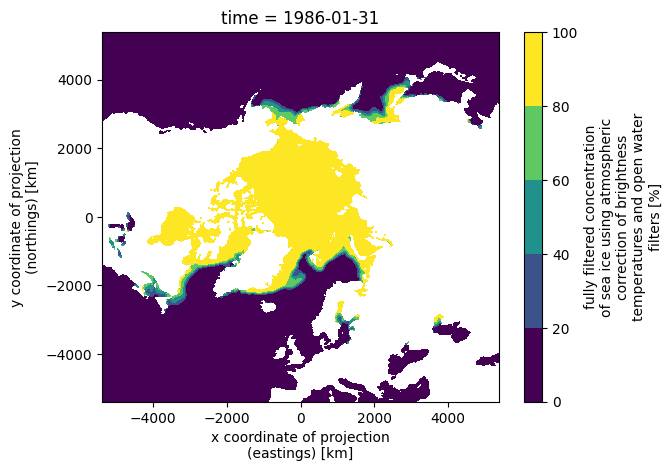

In [8]:
da.isel(time=idx_example).plot.contourf()

In [9]:
da.isel(time=idx_example).data[276, 230:260] = np.nan

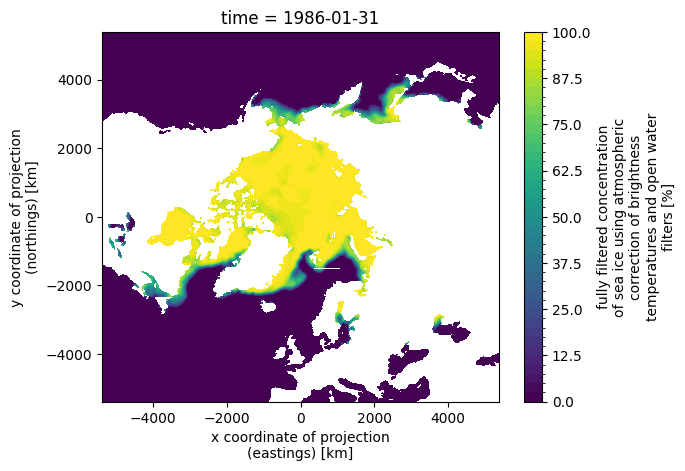

In [10]:
da.isel(time=idx_example).plot.contourf(levels=50)

In [11]:
proc_config = get_config("../pipeline/processed.masks.north.json")["data"]
mask_processor = get_processor_from_source("masks", proc_config)
masks = ["land","inactive_grid_cell","polarhole"]

INFO:root:Configuration ../pipeline/processed.masks.north.json being loaded
INFO:root:Attempting to instantiate icenet.data.masks.osisaf:Masks with loaded configuration
DEBUG:root:Converted kwargs from the retrieved configuration: {'absolute_vars': ['active_grid_cell', 'land', 'land_map', 'polarhole'], 'path': './processed/masks.north', 'processed_files': {'active_grid_cell': ['./processed/masks.north/active_grid_cell.north.nc'], 'land': ['./processed/masks.north/land.north.nc'], 'land_map': ['./processed/masks.north/land_map.north.nc'], 'polarhole': ['./processed/masks.north/polarhole.north.nc']}, 'source_files': {'land': 'processed_data/masks/land_mask.nh.npy', 'active_grid_cell': ['processed_data/masks/active_grid_cell_mask_nh_01.npy', 'processed_data/masks/active_grid_cell_mask_nh_02.npy', 'processed_data/masks/active_grid_cell_mask_nh_03.npy', 'processed_data/masks/active_grid_cell_mask_nh_04.npy', 'processed_data/masks/active_grid_cell_mask_nh_05.npy', 'processed_data/masks/activ

DEBUG:root:Getting masks land, inactive_grid_cell, polarhole from <icenet.data.masks.osisaf.Masks object at 0x7f4f5971cd60>


Masked values: 89097
Masked values: 153577
Masked values: 156049


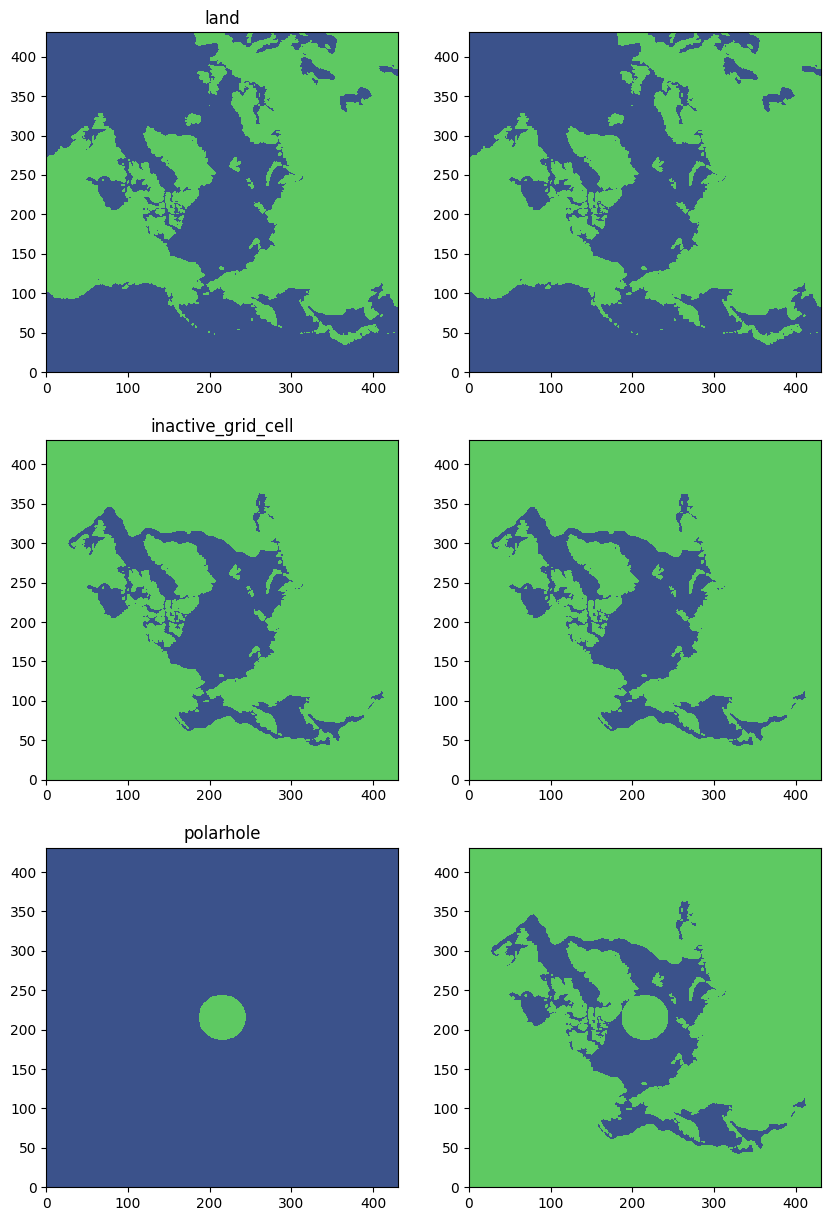

In [12]:
date = da.time.values[idx_example]
mask = None

fig, mask_axs = plt.subplots(len(masks), 2, figsize=(10, 15))

if mask_processor is not None:
    logging.debug("Getting masks {} from {}".format(", ".join(masks), mask_processor))
    for i, mask_type in enumerate(masks):
        if mask is None:
            mask = getattr(mask_processor, mask_type)(date)
            mask_axs[i,0].contourf(mask)
            mask_axs[i,1].contourf(mask)
        else:
            add_mask = getattr(mask_processor, mask_type)(date)
            mask_axs[i,0].contourf(add_mask)
            mask[add_mask] = True
            mask_axs[i,1].contourf(mask)
        print("Masked values: {}".format(np.sum(mask == True)))
        mask_axs[i,0].set(title=mask_type)

In [13]:
type(mask)

numpy.ndarray

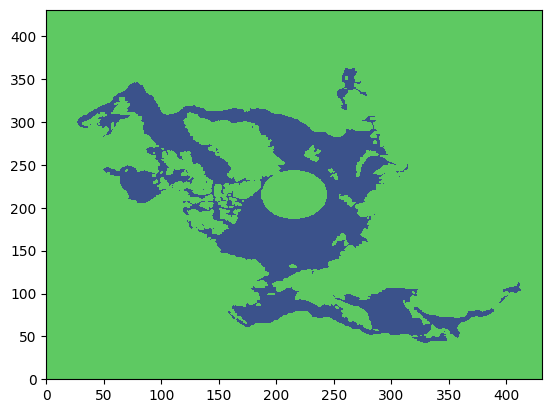

In [14]:
plt.contourf(mask)

In [15]:
# Check existing implementation
from preprocess_toolbox.dataset.spatial import spatial_interpolation
lib_test = da.isel(time=slice(idx_example,idx_example+1), xc=slice(200,300), yc=slice(200,300))
lib_test

<xarray.DataArray 'siconca' (time: 1, yc: 100, xc: 100)> Size: 80kB
array([[[96.54, 96.72, 96.88, ...,   nan,   nan,   nan],
        [96.4 , 96.57, 96.72, ...,   nan,   nan,   nan],
        [96.31, 96.46, 96.6 , ...,   nan,   nan,   nan],
        ...,
        [57.07, 55.76, 56.39, ...,   nan,   nan,   nan],
        [39.26, 40.7 , 43.16, ...,   nan,   nan,   nan],
        [22.74, 24.66, 29.96, ...,   nan,   nan,   nan]]])
Coordinates:
  * xc       (xc) float64 800B -387.5 -362.5 -337.5 ... 2.062e+03 2.088e+03
  * yc       (yc) float64 800B 387.5 362.5 337.5 ... -2.062e+03 -2.088e+03
    lat      (yc, xc) float32 40kB 85.09 85.25 85.4 85.54 ... 63.63 63.47 63.31
    lon      (yc, xc) float32 40kB -135.0 -136.9 -138.9 ... 44.31 44.65 45.0
  * time     (time) datetime64[ns] 8B 1986-01-31
Attributes:
    long_name:            fully filtered concentration of sea ice using atmos...
    standard_name:        sea_ice_area_fraction
    units:                %
    valid_min:            0
    valid_max:            10000
    grid_mapping:         Lambert_Azimuthal_Grid
    ancillary_variables:  total_standard_uncertainty status_flag
    comment:              this field is the primary sea ice concentration est...

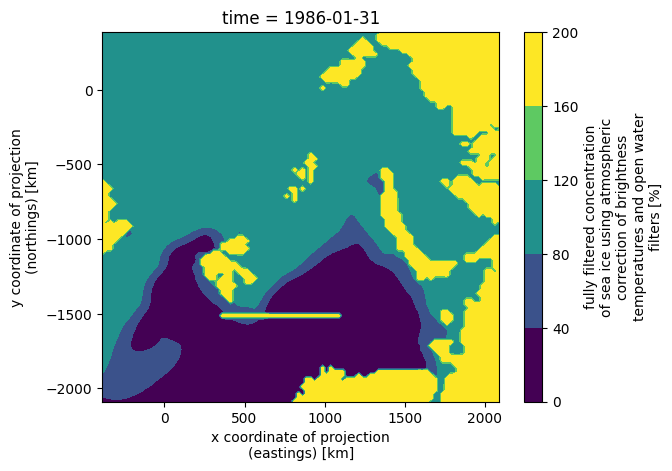

In [16]:
lib_test.isel(time=0).data[76, 30:60] = np.nan
lib_test.isel(time=0).fillna(200).plot.contourf()

INFO:root:Configuration ../pipeline/processed.masks.north.json being loaded
INFO:root:Attempting to instantiate icenet.data.masks.osisaf:Masks with loaded configuration
DEBUG:root:Converted kwargs from the retrieved configuration: {'absolute_vars': ['active_grid_cell', 'land', 'land_map', 'polarhole'], 'path': './processed/masks.north', 'processed_files': {'active_grid_cell': ['./processed/masks.north/active_grid_cell.north.nc'], 'land': ['./processed/masks.north/land.north.nc'], 'land_map': ['./processed/masks.north/land_map.north.nc'], 'polarhole': ['./processed/masks.north/polarhole.north.nc']}, 'source_files': {'land': 'processed_data/masks/land_mask.nh.npy', 'active_grid_cell': ['processed_data/masks/active_grid_cell_mask_nh_01.npy', 'processed_data/masks/active_grid_cell_mask_nh_02.npy', 'processed_data/masks/active_grid_cell_mask_nh_03.npy', 'processed_data/masks/active_grid_cell_mask_nh_04.npy', 'processed_data/masks/active_grid_cell_mask_nh_05.npy', 'processed_data/masks/activ

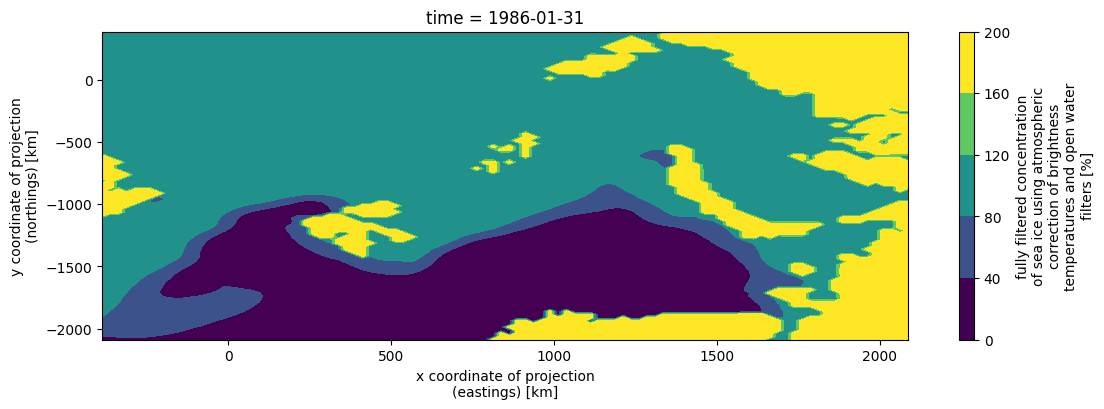

In [17]:
proc_config = get_config("../pipeline/processed.masks.north.json")["data"]
mask_processor = get_processor_from_source("masks", proc_config)
mask_processor.region = (slice(200, 300), slice(200, 300))
masks = ["land","inactive_grid_cell","polarhole"]
new_test = spatial_interpolation(lib_test.copy(), ds_config, mask_processor, masks, save_comparison_fig=True)
new_test.fillna(200).isel(time=0).plot.contourf()

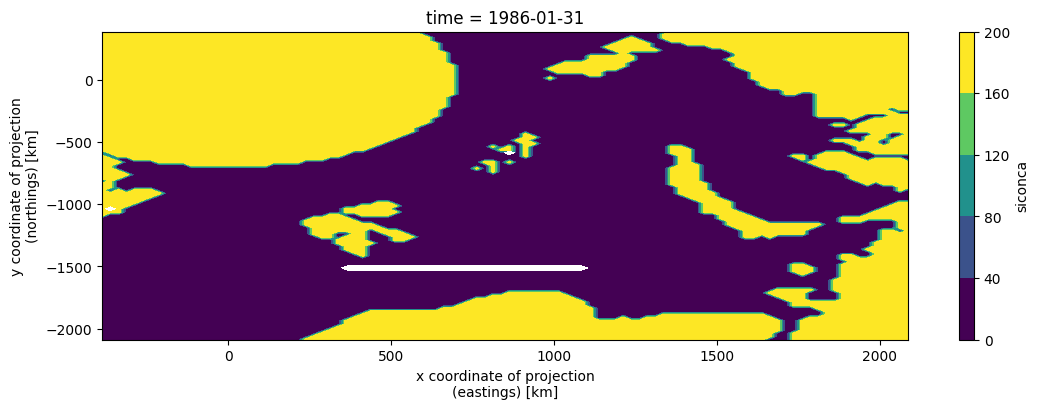

In [23]:
xr.where(mask[200:300, 200:300], 200, (new_test - lib_test).isel(time=0)).plot.contourf()

In [ ]:
da_el = da.isel(time=idx_example).copy()
#plt.contourf(da_el)
xr.where(mask, -1, da_el / 100).plot.contourf(levels=100)

In [ ]:
if len(da_el.shape) > 2:
    raise RuntimeError("Spatial interpolation is only available for 2D data: {} - {} spatial dims found".
                       format(len(da_el.shape), "x".format(da_el.shape)))
x_len, y_len = da_el.shape
xx, yy = np.meshgrid(np.arange(x_len), np.arange(y_len))

In [ ]:
# Grid cells outside NaN regions
valid = ~da_el.isnull()

In [ ]:
valid = valid & ~mask

In [ ]:
plt.contourf(valid)

In [ ]:
# Interpolate if there is more than one missing grid cell
if np.sum(~valid) >= 1:
    date_str = pd.to_datetime(date).strftime(ds_config.frequency.date_format)
    logging.info("Interpolating spatial data for {}".format(date_str))

    # Find grid cell locations surrounding NaN regions for bilinear
    # interpolation
    nan_mask = np.ma.masked_array(np.full((x_len, y_len), 0.))
    nan_mask[~valid] = np.ma.masked

In [ ]:
    plt.contourf(nan_mask)

In [ ]:
    nan_neighbour_arrs = {}
    # C - horizontal, F - vertical
    for order in 'C', 'F':
        # starts and ends indexes of masked element chunks
        slice_ends = np.ma.clump_masked(nan_mask.ravel(order=order))

        nan_neighbour_idxs = []
        nan_neighbour_idxs.extend([s.start for s in slice_ends])
        nan_neighbour_idxs.extend([s.stop - 1 for s in slice_ends])

        nan_neighbour_arr_i = np.array(
            np.full(shape=(x_len, y_len), fill_value=False),
            order=order)
        nan_neighbour_arr_i.ravel(order=order)[nan_neighbour_idxs] = True
        nan_neighbour_arrs[order] = nan_neighbour_arr_i

    nan_neighbour_arr = nan_neighbour_arrs['C'] + nan_neighbour_arrs['F']
    # Remove artefacts along edge of the grid
    nan_neighbour_arr[:, 0] = \
        nan_neighbour_arr[0, :] = \
        nan_neighbour_arr[:, -1] = \
        nan_neighbour_arr[-1, :] = False

In [ ]:
    plt.contourf(nan_neighbour_arr)

In [ ]:
    if np.sum(nan_neighbour_arr) == 1:
        res = np.where(np.array(nan_neighbour_arr) == True)  # noqa: E712
        logging.warning(
            "Not enough nans for interpolation, extending {}".format(res))

        x_idx, y_idx = res[0][0], res[1][0]
        nan_neighbour_arr[x_idx - 1:x_idx + 2, y_idx] = True
        nan_neighbour_arr[x_idx, y_idx - 1:y_idx + 2] = True
        logging.debug(
            np.where(np.array(nan_neighbour_arr) == True))  # noqa: E712

In [ ]:
    plt.contourf(nan_neighbour_arr)

In [ ]:
    # Perform bilinear interpolation
    x_valid = xx[nan_neighbour_arr]
    y_valid = yy[nan_neighbour_arr]
    values = da_el.data[nan_neighbour_arr]

    x_interp = xx[~valid]
    y_interp = yy[~valid]

In [ ]:
print(x_valid)
print(y_valid)
print(values)
print(x_interp)
print(y_interp)

In [ ]:
    before = da_el.copy()

    try:
        if len(x_valid) or len(y_valid):
            interp_vals = interpolate.griddata((x_valid, y_valid),
                                               values,
                                               (x_interp, y_interp),
                                               method='linear')
            da_el.data[~valid] = interp_vals
        else:
            logging.warning("No valid values to interpolate with on {}".format(date_str))
    except Exception as e:
        logging.warning("Interpolation failed for {}, assignment will not take place: {}".format(date_str, e))
    else:
        da.loc[dict(time=date)] = da_el

In [ ]:
len(interp_vals)

In [ ]:
da_el.plot.contourf()

In [ ]:
da_el.plot.contourf()


In [ ]:
da.isel(time=idx_example).plot.contourf()

In [ ]:
da_el

In [ ]:
da_interp = da_el.copy()

In [ ]:
da_interp.plot.contourf()

In [ ]:
print("Realising array for bilinear spatial interpolation... ", end='', flush=True)
da_interp.data = np.array(da_interp.data, dtype=np.float32)
print('Done.')

print("Bilinearly interpolating any polar hole and or NaNs grid cells...")
x = da_interp['xc'].data
y = da_interp['yc'].data

xx, yy = np.meshgrid(np.arange(432), np.arange(432))
polarhole_mask = mask_processor.polarhole(da_interp.time)

# Grid cells outside of polar hole or NaN regions
valid = ~np.isnan(da_interp.data)
valid = valid & ~polarhole_mask

plt.contourf(valid)

In [ ]:
# Interpolate if there is more than one missing grid cell
if np.sum(~valid) >= 1:

    ### Find grid cell locations surrounding NaN regions for bilinear interpolation
    nan_mask = np.ma.masked_array(np.full((432, 432), 0.))
    nan_mask[~valid] = np.ma.masked

    nan_neighbour_arrs = {}
    for direction in ('horiz', 'vertic'):

        # C-style indexing for horizontal raveling; F-style for vertical raveling
        if direction == 'horiz':
            order = 'C'  # Scan columns fastest
        elif direction == 'vertic':
            order = 'F'  # Scan rows fastest

        # Tuples with starts and ends indexes of masked element chunks
        slice_ends = np.ma.clump_masked(nan_mask.ravel(order=order))

        nan_neighbour_idxs = []
        nan_neighbour_idxs.extend([s.start - 1 for s in slice_ends])
        nan_neighbour_idxs.extend([s.stop for s in slice_ends])
        nan_neighbour_idxs = [el for el in nan_neighbour_idxs if el >= 0 and el < 432 ** 2]

        nan_neighbour_arr_i = np.array(np.full((432, 432), False), order=order)
        nan_neighbour_arr_i.ravel(order=order)[nan_neighbour_idxs] = True
        nan_neighbour_arrs[direction] = nan_neighbour_arr_i

    nan_neighbour_arr = nan_neighbour_arrs['horiz'] + nan_neighbour_arrs['vertic']
    # Remove artefacts along edge of the grid
    nan_neighbour_arr[:, 0] = nan_neighbour_arr[0, :] = nan_neighbour_arr[:, -1] = nan_neighbour_arr[-1, :] = False

    ### Perform bilinear interpolation
    x_valid = xx[nan_neighbour_arr]
    y_valid = yy[nan_neighbour_arr]
    values = da_interp.data[nan_neighbour_arr]

    x_interp = xx[~valid]
    y_interp = yy[~valid]

    da_interp.data[~valid] = interpolate.griddata((x_valid, y_valid), values, (x_interp, y_interp), method='linear')

In [ ]:
xr.where(mask, np.nan, da_interp).plot.contourf(levels=100)